In [11]:
import numpy as np
import sys
import pandas as pd
sys.path.append('../')
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("data/ca_water.csv", low_memory = False)
exp_data = data[['CharacteristicName', 'ResultMeasureValue']]

In [13]:
def isfloat(value): #check that values are floats
    try:
        float(value)
        return True
    except ValueError:
        return False

In [14]:
x = np.array(exp_data[exp_data['CharacteristicName'] == 'Orthophosphate']['ResultMeasureValue'])

pesticide = np.array([]) #looks at each element for nan 
for i in range(len(x)):
    if isfloat(x[i]):
        if np.logical_not(np.isnan(float(x[i]))):
            pesticide = np.append(pesticide, float(x[i]))
    else:
        pesticide = np.append(pesticide, 0)

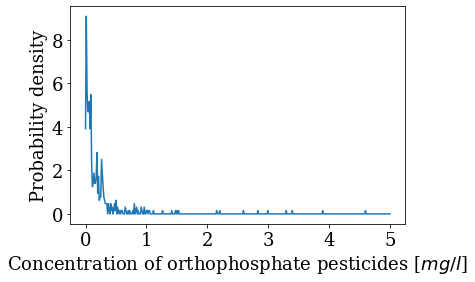

In [15]:
x0 = 0 #how to "histogram"
xf = 5
n_bin = 400
x = np.linspace(x0, xf, n_bin)

delta_x = x[1] - x[0]
x_bin = np.append(x,x[-1] + delta_x) - delta_x / 2
prob, x_bin = np.histogram(pesticide, bins=x_bin, density = True) #density = true makes it normalized

plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.plot(x, prob)

plt.xlabel('Concentration of orthophosphate pesticides [$mg/l$]')
plt.ylabel('Probability density [Conc^-1]')

plt.show() 

Need a stastical argument for what is missing